# 회귀 알고리즘(Regression)

* 분류 : 샘플을 몇 개의 클래스(카테고리) 중 하나로 분류 <br>
       Y is binary
* 회귀 : 임의의 어떤 숫자를 예측 <br>
       Y is continuous
<br>
즉, Y값을 도출하는 것은 동일하지만 해당 Y값이 클래스 분류인지, 특정 수치인지에 따라 분류와 회귀로 구분한다
<br> <br>

### 이웃 회귀(Neighbors Regression)

K-최근접 이웃 알고리즘을 사용해 회귀 문제를 푼다
<br> <br>

예측하려는 샘플에 가장 가까운 샘플 k개를 선택하고, 이 이웃 샘플의 수치를 사용해 새로운 샘플 x의 타깃(임의의 숫자)를 예측

=> 이웃 수치들의 평균을 구한다!

+) K-접근법 이웃 분류
: 이웃 샘플들의 클래스(타깃) 값을 확인하여 다수의 클래스를 new 샘플의 클래스로 예측

In [2]:
import numpy as np

# 특성 -> x축
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 타깃 -> y축
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

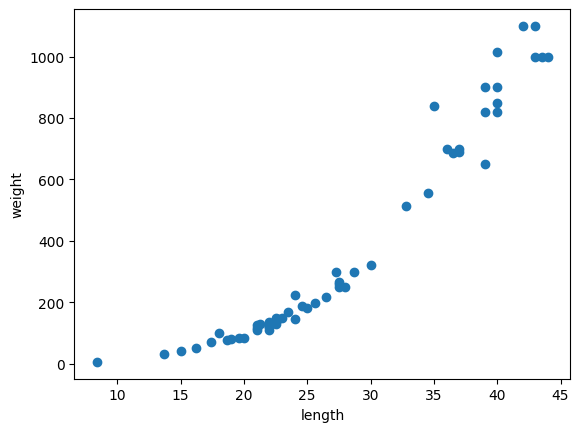

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이로 무게를 예측 <br>
("농어의 길이가 커짐에 따라 무게도 늘어난다")
<br><br>

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42) # 각각 1차원 배열

# 이때, 사이킷런에 사용할 훈련 세트는 2차원 배열이여야한다 [개체1:[특성1,특성2,...]],[개체2], [개체3]]
train_input = train_input.reshape(-1,1) # -1 : 바깥쪽 배열 갯수를 나머지 원소 개수로 채운다
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


모델 적용 전, 훈련 세트와 테스트 세트로 나눈다
<br><br>

In [5]:
from sklearn.neighbors import KNeighborsRegressor # K-최근접 이웃 회귀 알고리즘
knr = KNeighborsRegressor()

# 훈련
knr.fit(train_input, train_target)

# 평가
knr.score(test_input, test_target)

0.992809406101064

평가 in Regression <br>

> 결정계수(R^2) : 우리의 예측이 얼마나 data들에 fit한가 ('적합도')<br>
(-1 ~ 1)

= ESS / TSS  <br>
= 1 - RSS / TSS <br>
= 1 - (타깃-예측)^2의 합 / (타깃-평균)^2의 합

0 : 타깃의 평균 정도만 예측하는 수준(bad) / 1 : 예측과 타깃이 아주 가까움 (good)
<br><br>

In [6]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 반환
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 절댓값 오차
RSS = mean_absolute_error(test_target, test_prediction)
print(RSS)

19.157142857142862


타깃(Observed Data)와 예측(Explained) 데이터 간의 절댓값 오차 평균 반환 <br>
=> 결과에서 예측이 평균적으로 19g 정도 타깃값(실제값)과 다르다
<br><br>

In [7]:
print(knr.score(train_input, train_target))

0.9698823289099254


> Q. 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나와야하는 거 아닌가? <br>
A. 이거 과소 적합된거네


* 과대 적합 : 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서 점수가 굉장히 나쁨 <br>
=> 훈련 세트에만 잘 맞는 모델이라 실전에 투입해 새로운 샘플에 대한 예측을 만들 때 잘 동작 X

* 과소 적합 : 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우 <br>
=> 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우, 또는 세트 데이터 크기가 너무 작은 경우
<br><br>

In [9]:
# 이웃의 갯수를 줄인다
knr.n_neighbors = 3

# 재훈련
knr.fit(train_input, train_target)

# 평가
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


과소 적합 해결 : 모델을 더 복잡하게 만든다
ㄴ In K-최근접 이웃 알고리즘 : 이웃의 개수를 줄인다

* 이웃 개수 down : 훈련 세트에 있는 국지적인 패턴에 민감
* 이웃 개수 up : 데이터 전반에 있는 일반적인 패턴 따름
<br><br>

In [10]:
# 길이가 50cm인 농어 무게 예측
knr.predict([[50]])

array([1033.33333333])

모델은 50cm 길이(x)의 농어 무게(y)를 1.033로 예측,<br>
그러나 실제 이 농어의 무게는 훨씬 더 많이 나간다고 한다
<br><br>

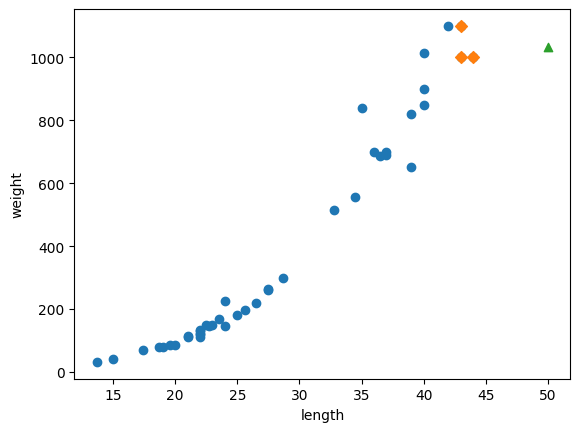

In [11]:
# 50cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[50]]) # '특성값' 기준 이웃

# 산점도
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

앞서 말했듯, 농어의 길이가 커질수록 무게가 증가하기에 50cm 길이의 농어는 45cm 농어보다 무게가 더 나갈 것으로 예측해야한다. <br>
그러나 이 예시에선 50cm 농어의 가장 가까운 이웃들이 45cm 근방밖에 없기 때문에 <br>
해당 농어들의 무게를 평균한 값을 자신(50cm)의 무게로 삼는다 <br>
<br>

In [12]:
print(np.mean(train_target[indexes]))
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


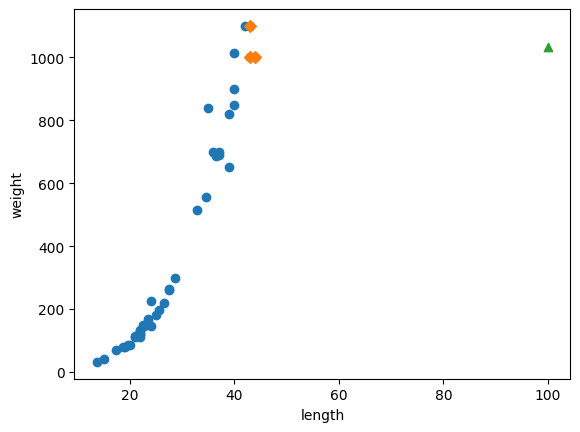

In [13]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

가장 큰 농어가 포함되도록 훈련 세트를 다시 만들지 않는 이상 농어가 아무리 커도 무게가 더 늘어나지 않는다. <br>

즉, k-최근접 이웃회귀는 가까운 샘플을 찾아 타깃을 평균하기 때문에, 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.

"다른 알고리즘이 필요하겠다"
<br><br><br>

### 선형 회귀(Linear Regression)

특성(X)와 타깃(Y)의 관계를 가장 잘 예측하는 '직선'을 학습하는 회귀 알고리즘

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 훈련
lr.fit(train_input, train_target)

# 예측
lr.predict([[50]])

array([1241.83860323])

훈련 세트 범위 밖의 샘플 예측 성공!

<br>

In [15]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


머신러닝 알고리즘이 찾은 최적의 Estimator : For 예측 model parameter *a, b*  <br>
=> '모델 기반 학습' : 머신러닝 훈련을 통해 최적의 모델 파라미터를 찾는다

(vs 사례 기반 학습 : 훈련 세트를 저장하는 것이 훈련의 전부 ex) k-최근접 이웃법)

<br>

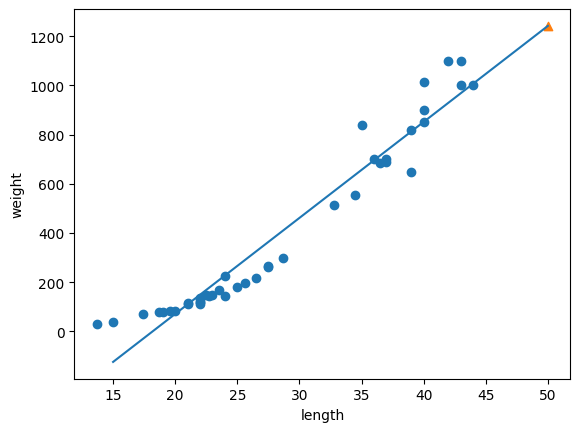

In [16]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50,1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_input, train_target)) # 훈련세트
print(lr.score(test_input, test_target)) # 테스트 세트

0.939846333997604
0.8247503123313558


> 문제

* 훈련 세트, 테스트 세트 점수 모두 그다지 높지 않음
* 왼쪽 아래로 쭉 뻗어있는 직선대로 예측하면 20cm보다 작은 농어의 무게가 0 이하 (비현실적)

<br><br><br>



### 다항 회귀 (Polynomial Regression)

"최적의 직선이 아닌 최적의 '곡선'을 찾아라"

In [19]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


길이를 제곱한 항 훈련 세트에 추가
<br><br>

In [20]:
lr = LinearRegression()

# 훈련
lr.fit(train_poly, train_target) # 타깃 세트는 그대로 사용

# 예측
lr.predict([[50**2, 50]])

array([1573.98423528])

In [21]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01 x 길이(2) - 21.6 x 길이 + 116.05
<br><br>

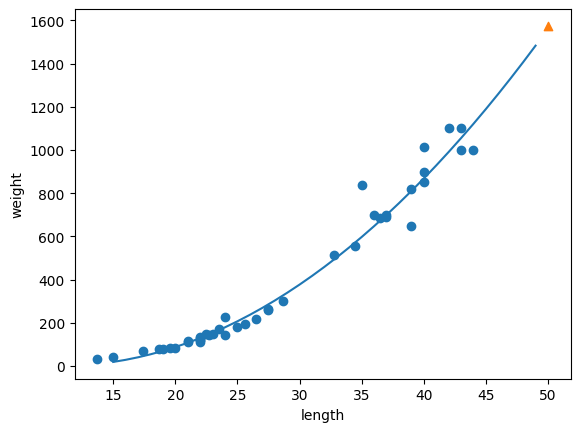

In [23]:
point = np.arange(15,50) # 15에서 49까지 정수배열을 만든다

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(train_poly, train_target))
print(lr.score(train_poly, train_target))

0.9706807451768623
0.9706807451768623


선형 회귀 모델보다 나은 그래프, 적합도를 가진 모델 도출 !

<br><br>

### 다중 회귀(Multiple Regression)

여러 개의 특성을 사용한 선형 회귀

In [26]:
import pandas as pd # 판다스(데이터 분석 라이브러리)를 이용해

# length, height, width (x, 입력 데이터)
df = pd.read_csv('https://bit.ly/perch_csv_data') # 데이터(csv파일)를 인터넷에서 내려 받아 데이터 프레임에 저장
perch_full = df.to_numpy() # 넘파이 배열로 변환 (선형 회귀 훈련 준비 완)

In [27]:
# 타깃 데이터(y)는 동일한 방식으로 준비
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [28]:
# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

입력 데이터와 타깃 데이터를 준비한다.
<br><br>


In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False) # 변환기 객체 생성 (절편 무시)
poly.fit(train_input) # 새롭게 만들 특성 조합을 찾는다 (입력 데이터만 전달)
train_poly = poly.transform(train_input) # 실제로 데이터를 변환한다 (입력 데이터만 전달)

print(train_poly.shape)
print(poly.get_feature_names_out())

(42, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [30]:
test_poly = poly.transform(test_input) # 항상 훈련세트를 기준(훈련 세트 fit한 poly 객체)으로 테스트 세트 변환

변환기(Transformer) 클래스 <br>
: 특성을 만들거나 전처리하기 위한 클래스

=> 기본적으로 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가 <br><br>


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 훈련
lr.fit(train_poly, train_target)

# 평가
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


과소 적합 문제 해결! 적합도도 Good!

<br><br>

# 모델 규제(Regularization)

모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것 (과대적합 방지) <br>
선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 것 (보다 보편적인 패턴 학습)


In [32]:
# 5제곱까지 특성을 만들어 출력
poly = PolynomialFeatures(degree = 5, include_bias=False)

# 조합
poly.fit(train_input)

# 변환
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


In [33]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


> 테스트 세트에 대한 점수가 아주 큰 음수로 나옴 !

특성의 갯수를 크게 늘리면 선형 모델은 훈련 세트에 대해 거의 완벽하게 학습하지만, <br>
동시에 훈련 세트에 너무 과대 적합되므로 테스트 세트에선 형편없는 점수를 만든다<br>
(External Validity 확보 X : Generalization X)
<br>

=> 규제 필요!<br><br>

In [36]:
from sklearn.preprocessing import StandardScaler  # 변환기 클래스 中 1
ss = StandardScaler()

ss.fit(train_poly) # 그 55개 특성짜리...

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

특성 스케일 정규화 필요 !

곱해지는 계수 값의 크기가 서로 다르면 규제를 적용할 때 공정하게 제어되지 않음

<br>

### 릿지 회귀

선형 회귀에 규제를 추가한 모델로, <br>
계수를 제곱한 값을 기준으로 규제 적용 <br>
(일반적으로 더 선호)

In [37]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# 훈련
ridge.fit(train_scaled, train_target)

# 평가
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


테스트 세트 점수 정상화 ! <br><br>

In [39]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list :
  # 모델 생성
  ridge = Ridge(alpha=alpha)
  # 훈련
  ridge.fit(train_scaled, train_target)
  # 평가 & 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

릿지와 라쏘 모델을 사용할 때 규제 양을 임의로 조정할 수 있다. <br>
모델 객체를 만들 때 매개변수(하이퍼파라미터), alpha를 전달하는데, <br>
값이 클 수록 강도가 세져 계수 값을 더 줄인다(과소적합유도).  

적절한 alpha 값은 훈련 세트와 테스트 세트의 적합도가 가장 가까운 지점이다. <br><br>

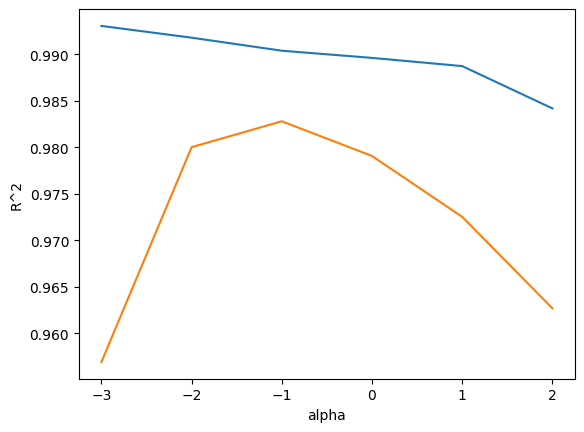

In [40]:
# 6개의 값을 동일한 간격으로 나타내기 위해 10로그 함수로 바꾸어 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 왼쪽(규제⬇) : 훈련 세트와 테스트 세트 점수 차이 매우 큰 '과대 적합'
* 오른쪽(규제⬆) : 훈련 세트와 테스트 세트 모두 낮아지는 '과소 적합'
<br>

 "적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 -1(0.1)이다!"<br><br>

In [41]:
# 모델 생성
ridge = Ridge(alpha = 0.1)

# 훈련
ridge.fit(train_scaled, train_target)

# 평가
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


최적 alpha 값을 바탕으로 최종 모델 훈련! <br>
훈련 세트와 테스트 세트 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이 균형 유지! <br>
<br><br>


### 라쏘 회귀

선형 회귀에 규제를 추가한 모델로, <br>
계수의 절댓값을 기준으로 규제 적용 <br>
※ 계수를 0으로 만들 수도 있다

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# 훈련 (+규제)
lasso.fit(train_scaled, train_target)

# 평가
print(lasso.score(train_scaled, train_target))
print(lasso.score(train_scaled, train_target))

0.989789897208096
0.989789897208096


In [44]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled , train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.336e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.062e+02, tolerance: 5.183e

+) ConvergenceWarning
라쏘 모델은 훈련할 때 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 경고 발생

=> max_iter 매개변수 값 10000으로 지정<br><br>

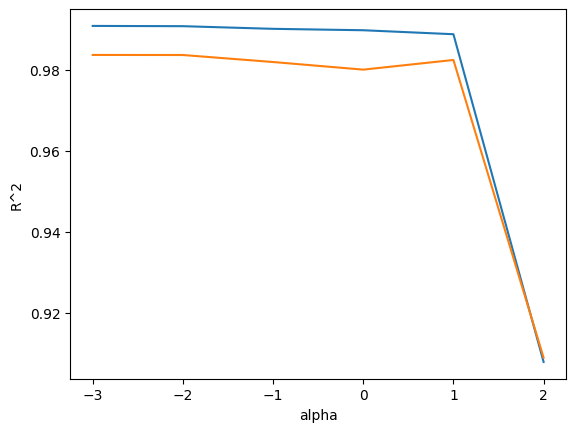

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

* 왼쪽 : 과대 적합 (훈련세트 점수 > 테스트세트 점수)
* 오른쪽 : 과소 적합 (훈련 세트, 테스트 세트 점수 모두 낮음

  => 최적 alpha 값은 1, 즉 10이다.<br><br>

In [46]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


최적 alpha 값으로 최종 훈련! <br>
특성을 많이 사용했음에도 과대적합을 잘 억제하고 테스트 세트 성능을 크게 향상  <br><br>

In [47]:
print(np.sum(lasso.coef_ == 0))

40


Coefficient가 0이 되는 계수 갯수 : 40개 (True==1) <br>
<-> 55개 특성 중 라쏘 모델이 사용한 특성은 15개 밖에 되지 않는다.

=> 유용한 특성을 골라내는 용도로도 사용 가능